<a href="https://colab.research.google.com/github/alfredoEP/Redes-Neuronales-Duchanoy/blob/master/Preprocesador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, exposure, io, color
from google.colab import files

In [0]:
matriz = []
for i in list(range(1,51)):
  matriz.append(plt.imread(f'camaronesEmpanizadosAlCoco ({i}).jpg'))

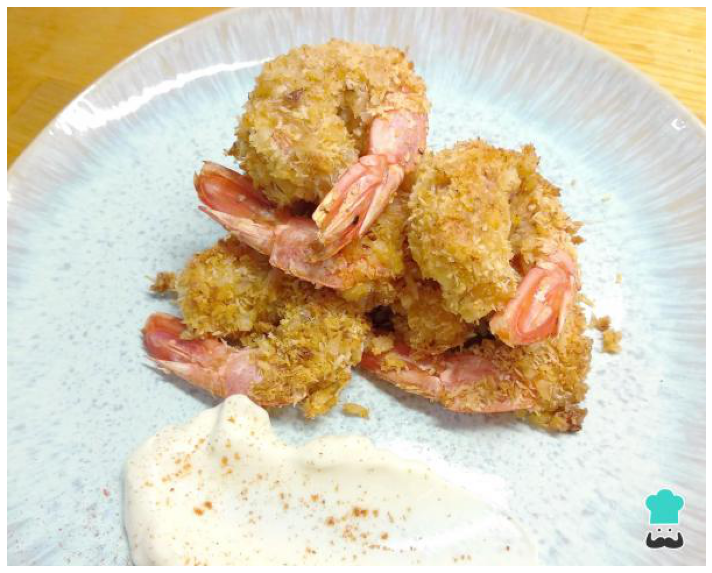

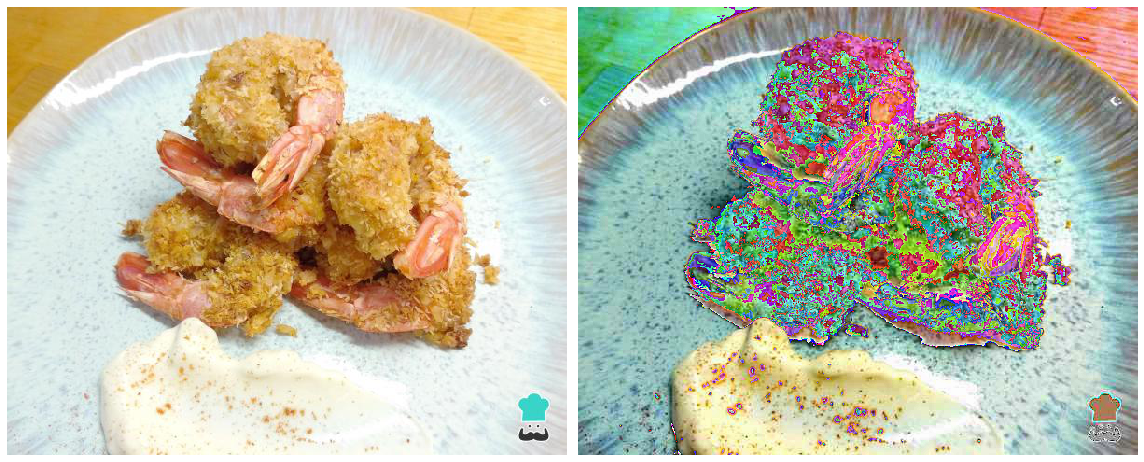

In [3]:
camera = plt.imread('camaronesEmpanizadosAlCoco (1).jpg')

plt.figure(figsize=(10, 10))
plt.imshow(camera)#, cmap='gray')#, interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

camera_multiply = 3 * camera

plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.subplot(122)
plt.imshow(camera_multiply, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.tight_layout()
plt.show()

0 480 600


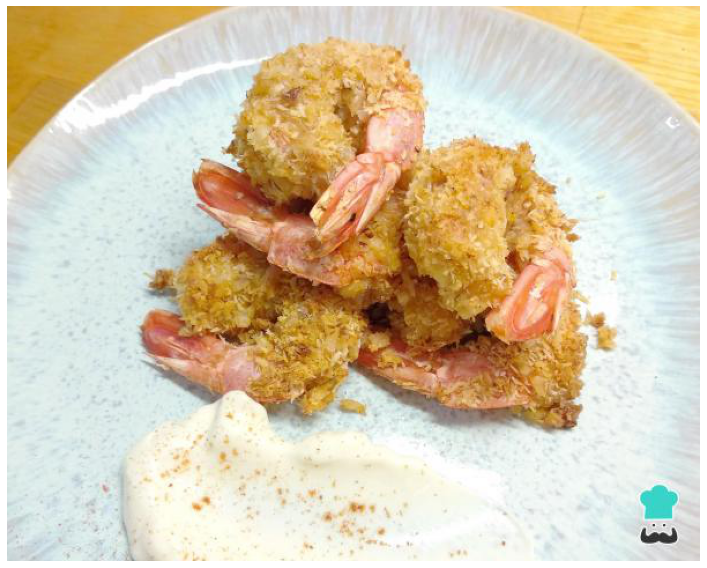

1 320 630


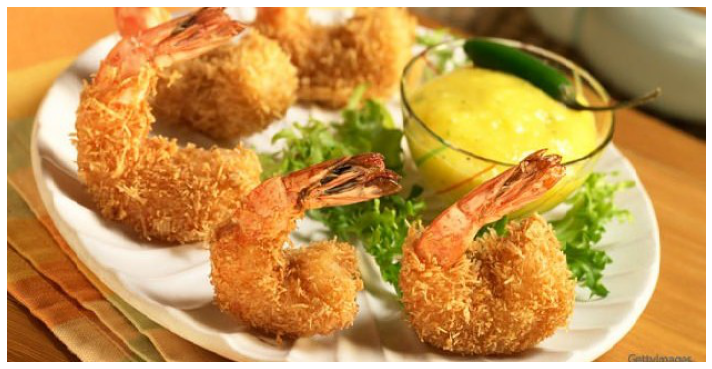

2 800 1200


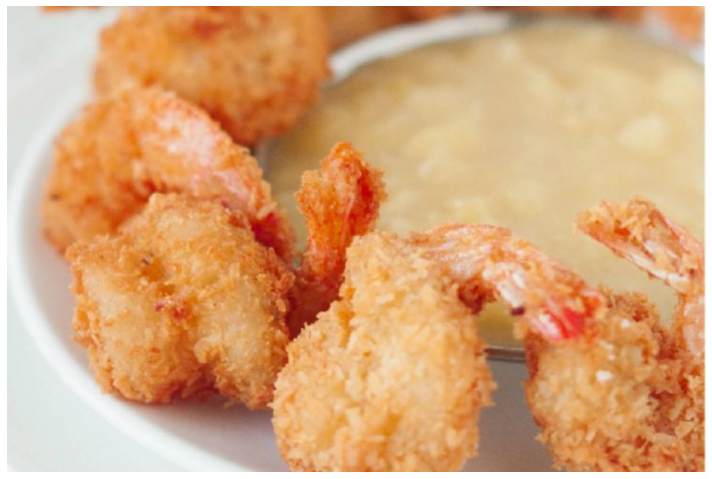

In [4]:
for i,j in enumerate(matriz[0:3]):
  plt.figure(figsize=(10, 8))
  print(i, len(j), len(j[0]))
  plt.imshow(j)
  plt.axis('off')
  plt.tight_layout()
  plt.show()

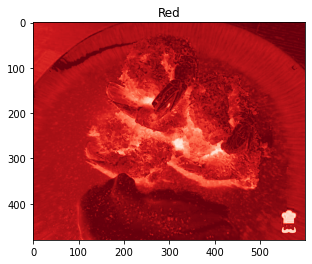

In [5]:
red = matriz[0][:, :, 0]
green = matriz[0][:, :, 1]
blue = matriz[0][:, :, 2]

plt.imshow(red, cmap='Reds')
plt.title('Red')
plt.show()

plt.imshow(green, cmap='Greens')
plt.title('Green')
plt.show()

plt.imshow(blue, cmap='Blues')
plt.title('Blue')
plt.show()

In [0]:
lenMatriz = []
for i in matriz:
  lenMatriz.append([len(i),len(i[0])])

In [7]:
for i in enumerate(lenMatriz):
  print(i)

(0, [480, 600])
(1, [320, 630])
(2, [800, 1200])
(3, [404, 700])
(4, [366, 550])
(5, [240, 320])
(6, [365, 550])
(7, [601, 900])
(8, [881, 1281])
(9, [994, 1000])
(10, [623, 460])
(11, [225, 360])
(12, [447, 550])
(13, [532, 1024])
(14, [960, 1280])
(15, [320, 630])
(16, [2000, 2000])
(17, [366, 550])
(18, [1003, 735])
(19, [3318, 2212])
(20, [450, 740])
(21, [532, 800])
(22, [1110, 840])
(23, [720, 1280])
(24, [720, 1280])
(25, [638, 850])
(26, [225, 225])
(27, [183, 275])
(28, [506, 900])
(29, [920, 565])
(30, [575, 575])
(31, [3264, 2448])
(32, [355, 550])
(33, [1800, 1200])
(34, [969, 650])
(35, [1020, 680])
(36, [1333, 2000])
(37, [420, 634])
(38, [477, 848])
(39, [532, 751])
(40, [450, 800])
(41, [450, 800])
(42, [450, 800])
(43, [315, 560])
(44, [2592, 1936])
(45, [294, 482])
(46, [450, 450])
(47, [640, 960])
(48, [600, 807])
(49, [299, 595])


In [11]:
M = max(lenMatriz); print(M)
m = min(lenMatriz); print(m)
np.zeros(M)
centro        = [ round(M[0]/2) , round(M[1]/2) ]
print(centro)
tamaño_imagen = [ round(len(matriz[27])/2), round(len(matriz[27][0])/2) ]
print(tamaño_imagen)
centro[0] - tamaño_imagen[0] , centro[1] - tamaño_imagen[1]

[3318, 2212]
[183, 275]
[1659, 1106]
[92, 138]


(1567, 968)

In [30]:
image = color.rgb2gray(matriz[0])
print(image.shape)
print(image.size)

a = [int(np.median(np.transpose(lenMatriz)[0])), int(np.median(np.transpose(lenMatriz)[1]))]
relacion = a[0] / a[1]
print(a)
print(relacion)
altura_media = 500 #int(np.median(np.transpose(lenMatriz)[0]))

(480, 600)
288000
[532, 745]
0.7140939597315437


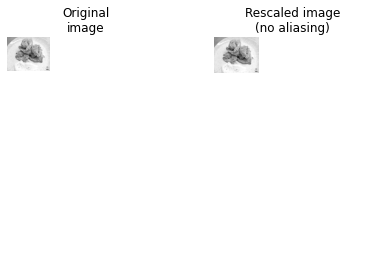

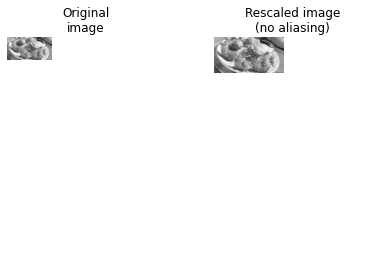

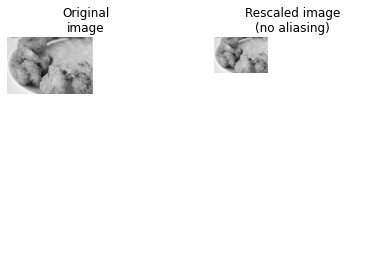

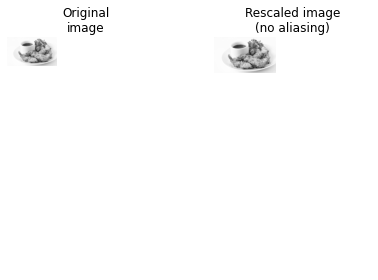

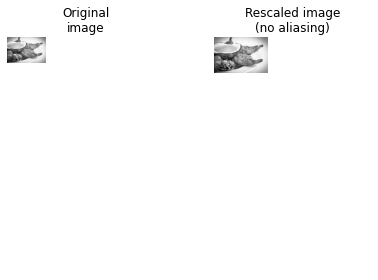

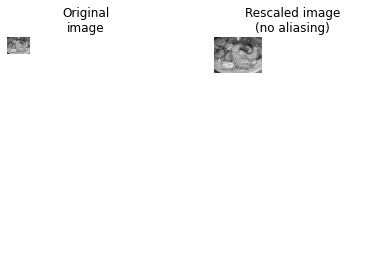

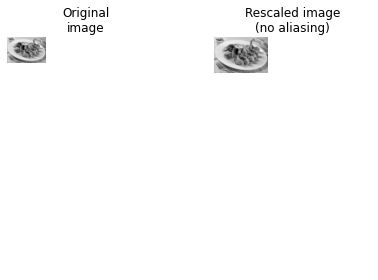

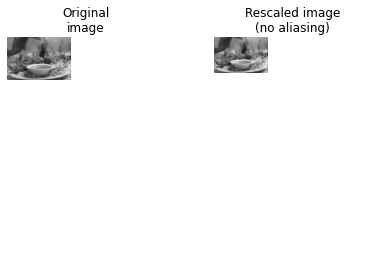

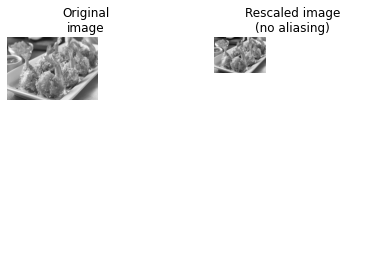

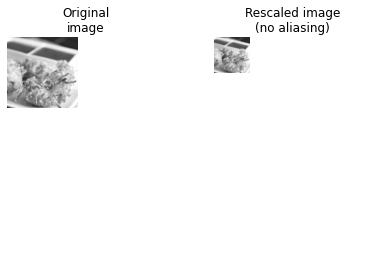

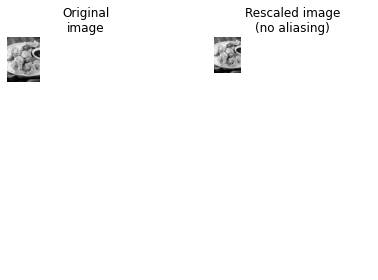

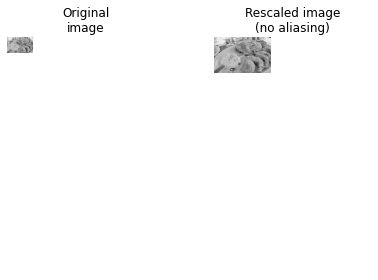

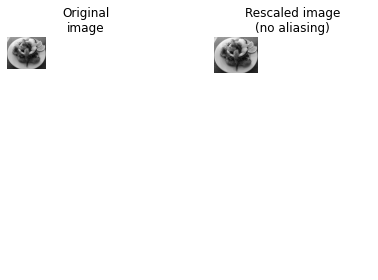

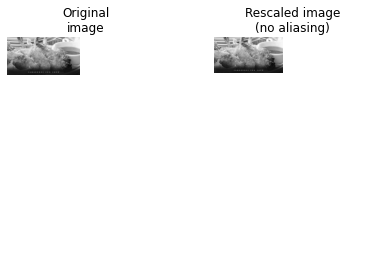

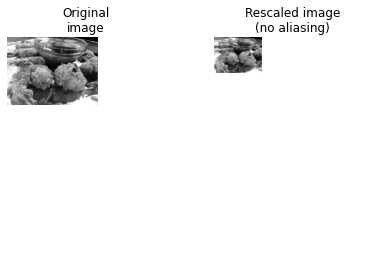

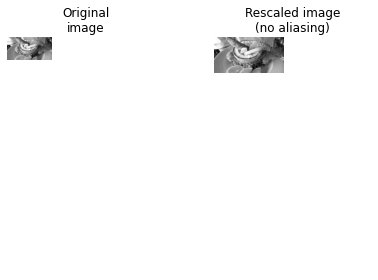

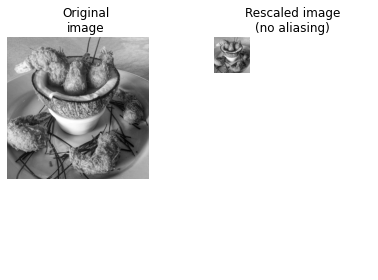

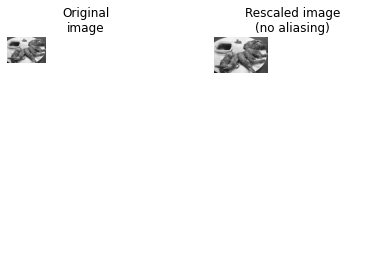

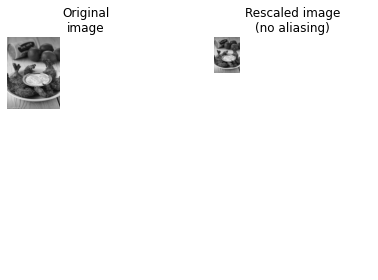

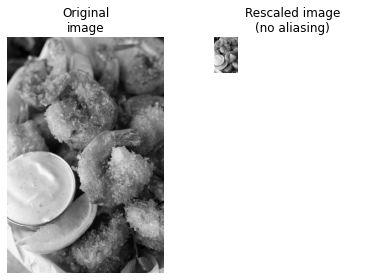

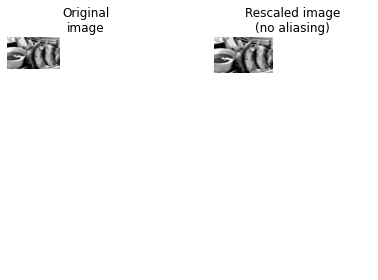

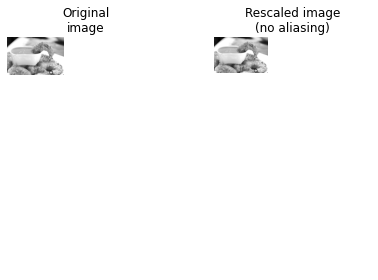

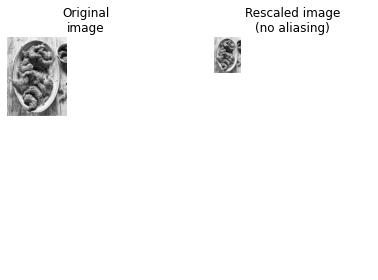

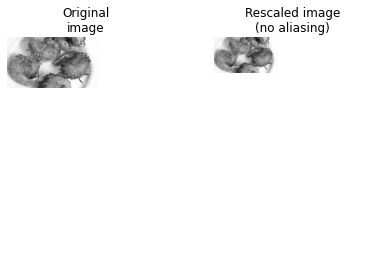

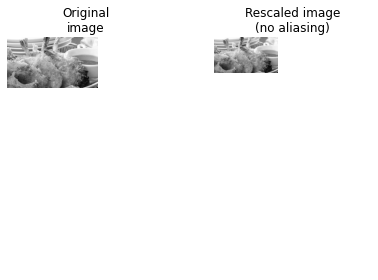

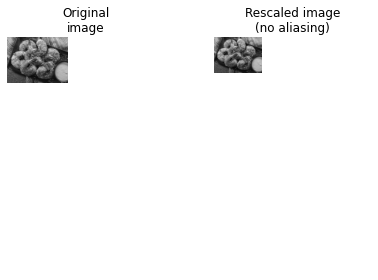

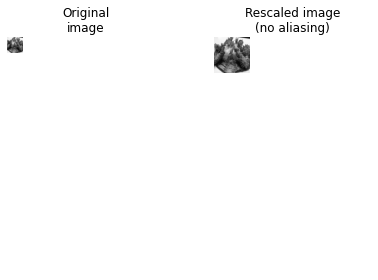

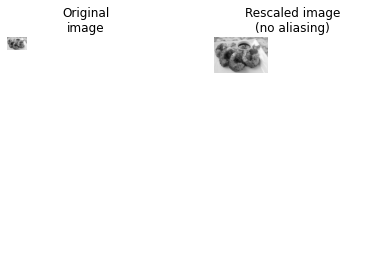

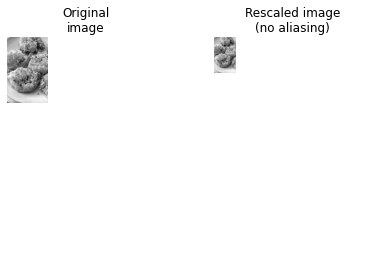

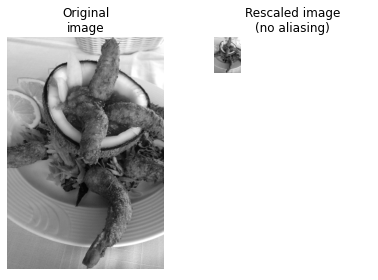

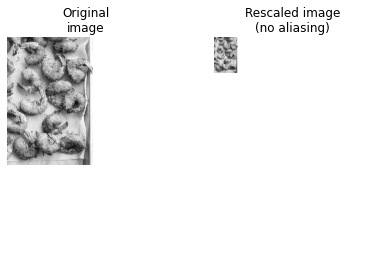

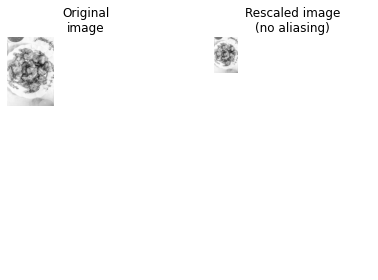

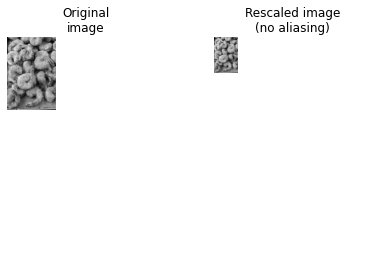

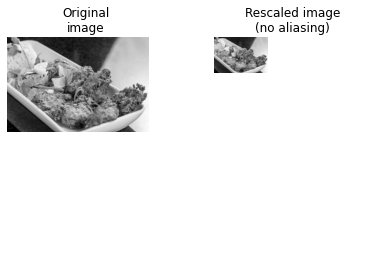

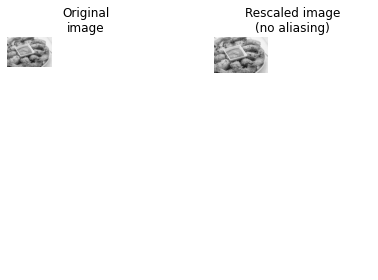

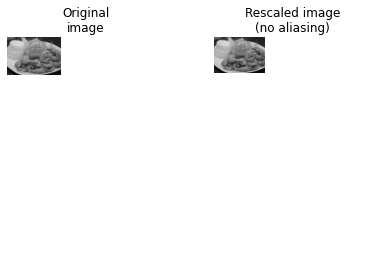

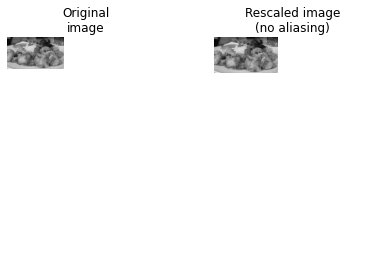

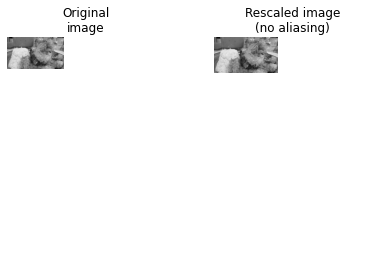

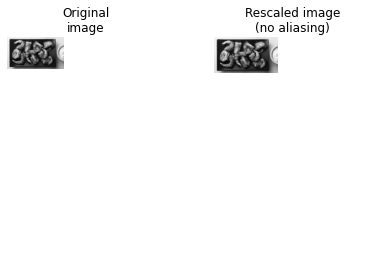

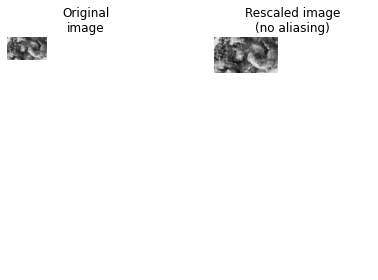

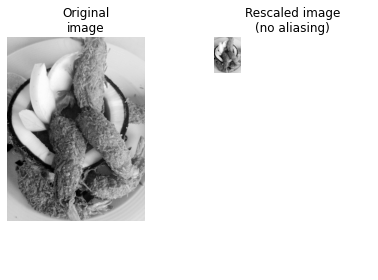

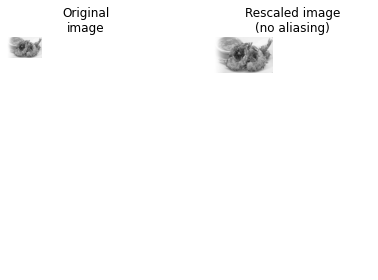

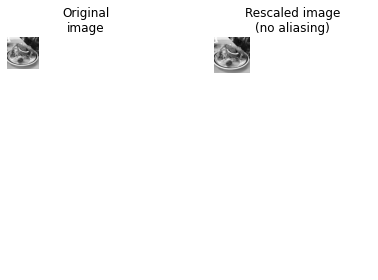

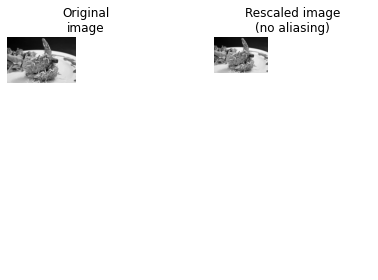

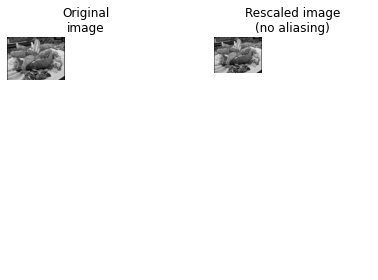

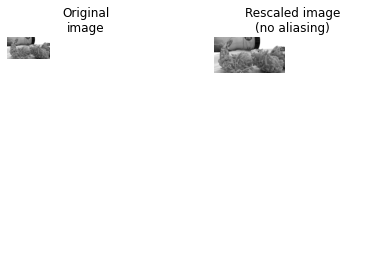

In [31]:
import matplotlib.pyplot as plt

from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean

imagenes_reescaladas = []
for i in matriz[0:50]:
  image = color.rgb2gray(i)
  #ancho_proporcional = image.shape

  image_rescaled = rescale(image, altura_media / color.rgb2gray(i).shape[0] , anti_aliasing=True)
  #image_rescaled = resize(image, (540,960), anti_aliasing=True)
  imagenes_reescaladas.append(image_rescaled)
  #image_resized = resize(image, (540,960), anti_aliasing=True)

  fig, axes = plt.subplots(nrows=1, ncols=2)
  ax = axes.ravel()

  ax[0].imshow(image, cmap='gray')
  ax[0].set_title("Original\nimage")
  ax[0].axis('off')

  ax[0].set_xlim(0, M[1])
  ax[0].set_ylim(M[0], 0)

  ax[1].imshow(image_rescaled, cmap='gray')
  ax[1].set_title("Rescaled image\n(no aliasing)")
  ax[1].axis('off')

  ax[1].set_xlim(0, M[1])
  ax[1].set_ylim(M[0], 0)

  plt.tight_layout()
  plt.show()

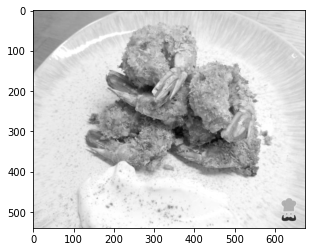

In [17]:
plt.imshow(imagenes_reescaladas[0], cmap='gray')

In [36]:
maxima = 0
for i in imagenes_reescaladas:
  if len(i[0]) > maxima:
    maxima = len(i[0])
maxima

995

In [0]:
maximo_ancho = 2000 #maxima

In [0]:
#zeroes()
altura_media = 500

In [38]:
centro_de_matriz_de_ceros = int(maximo_ancho / 2)
#or(np.zeros([altura_media,maximo_ancho]),imagenes_reescaladas[0)]
print(centro_de_matriz_de_ceros)

1000


In [39]:
imagenes_reescaladas[0].shape

(500, 625)

In [40]:
maximo_ancho - imagenes_reescaladas[0].shape[1]

1375

In [41]:
desplazamiento = int((maximo_ancho - imagenes_reescaladas[0].shape[1]) / 2)
desplazamiento

687

In [42]:
relleno = np.zeros(desplazamiento)
relleno

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

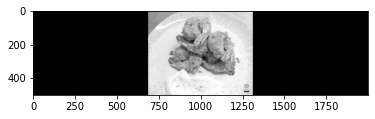

In [44]:
nuevaImagen = []

for j in imagenes_reescaladas[0]:
  j = np.concatenate((relleno,j,relleno),axis=None)
  nuevaImagen.append(j)
plt.imshow(nuevaImagen,cmap='gray')

In [0]:
imagenes_con_relleno = []

for cadaImagen in imagenes_reescaladas:
  desplazamiento = int((maximo_ancho - cadaImagen.shape[1]) / 2)
  relleno = np.zeros(desplazamiento)
  #print(desplazamiento)
  imagen_con_relleno = []
  for filaDeLaImagen in cadaImagen:
    filaDeLaImagen = np.concatenate((relleno,filaDeLaImagen,relleno), axis=None)
    imagen_con_relleno.append(filaDeLaImagen)
  imagenes_con_relleno.append(imagen_con_relleno)

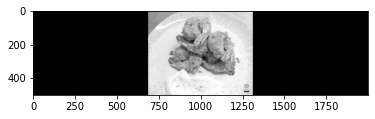

In [46]:
plt.imshow(imagenes_con_relleno[0],cmap='gray')

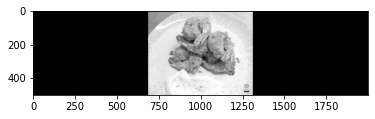

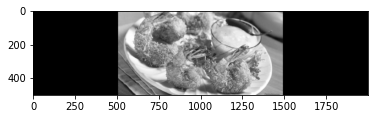

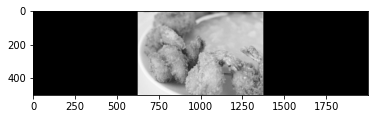

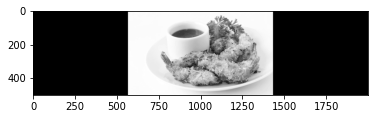

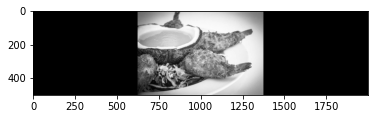

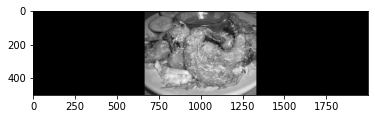

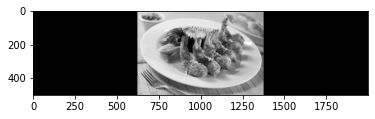

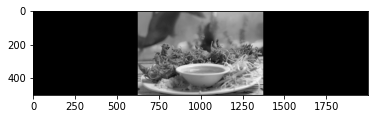

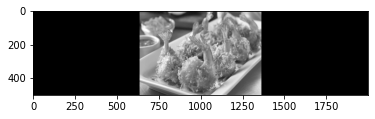

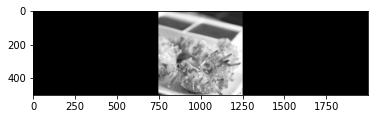

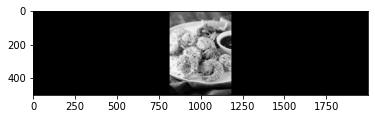

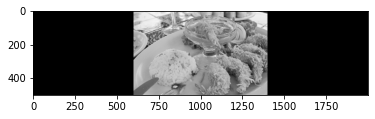

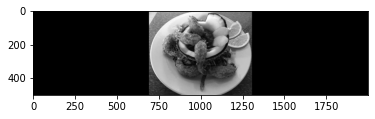

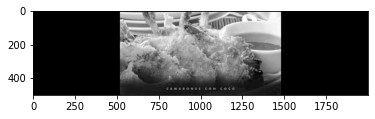

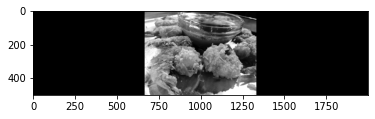

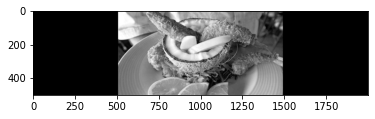

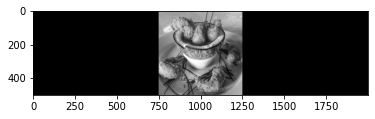

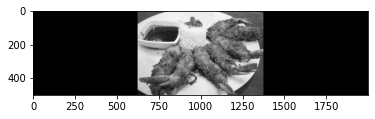

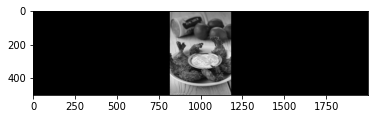

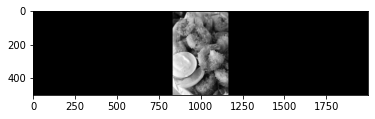

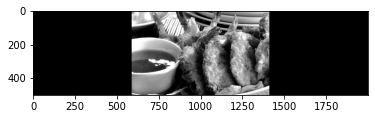

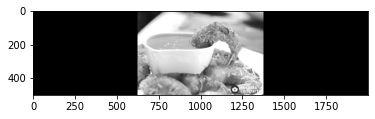

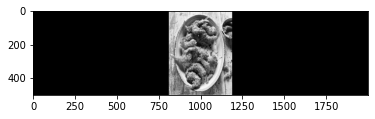

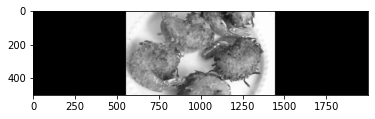

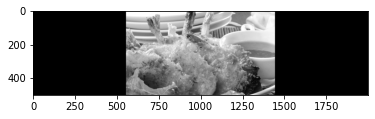

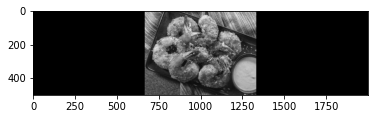

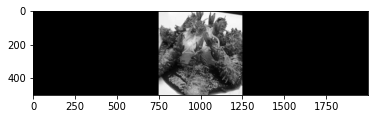

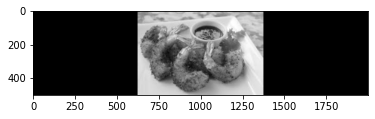

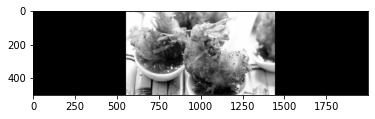

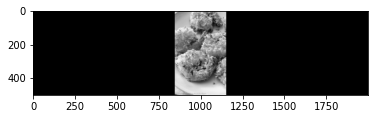

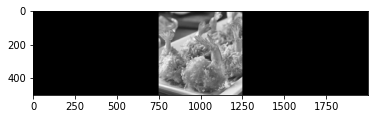

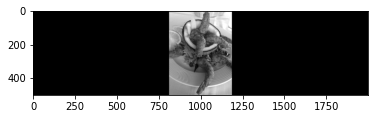

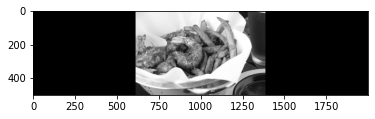

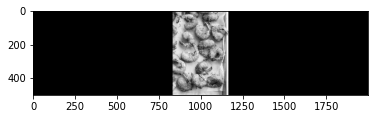

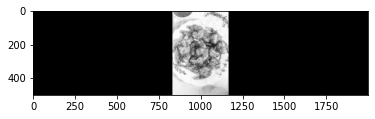

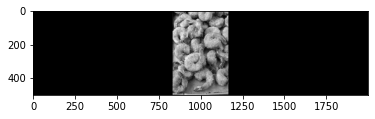

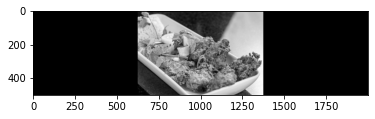

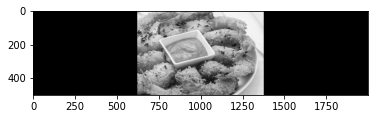

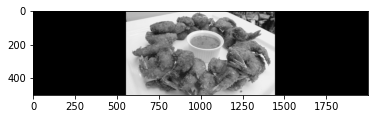

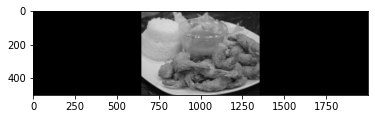

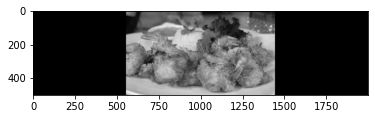

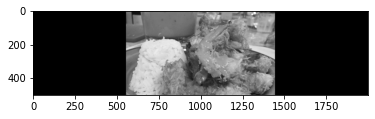

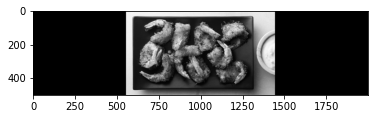

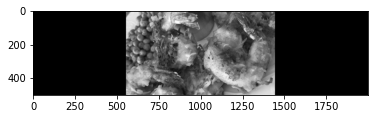

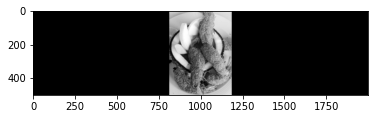

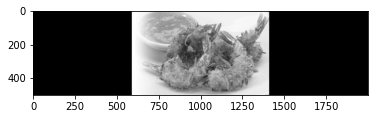

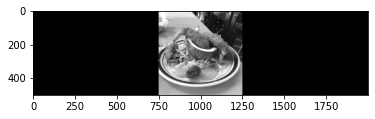

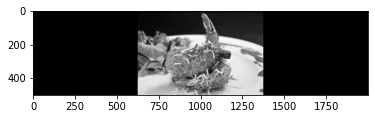

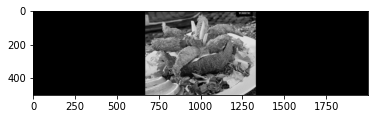

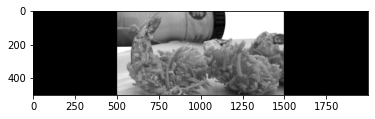

In [47]:
for i in imagenes_con_relleno:
  plt.imshow(i,cmap='gray')
  plt.show()

In [0]:
%mkdir MiProyecto

In [0]:
plt.imsave('/content/MiProyecto/cE1.jpg',imagenes_con_relleno[0],cmap='gray')

In [0]:
mkdir myproject

In [52]:
cd /content/MiProyecto

/content/MiProyecto


In [0]:
plt.imsave('/content/myproject/cE1.jpg',imagenes_con_relleno[0],cmap='gray')
#files.download('cE1.jpg')
plt.imsave('/content/myproject/cE2.jpg',imagenes_con_relleno[1],cmap='gray')
#files.download('cE2.jpg')

In [0]:
for i, j in enumerate(imagenes_con_relleno):
  plt.imsave('/content/MiProyecto/cE{0}.jpg'.format(i+1),imagenes_con_relleno[i],cmap='gray')

In [55]:
!zip -r /content/MiProyecto.zip /content/MiProyecto

  adding: content/MiProyecto/ (stored 0%)
  adding: content/MiProyecto/cE25.jpg (deflated 13%)
  adding: content/MiProyecto/cE46.jpg (deflated 21%)
  adding: content/MiProyecto/cE49.jpg (deflated 16%)
  adding: content/MiProyecto/cE44.jpg (deflated 14%)
  adding: content/MiProyecto/cE4.jpg (deflated 23%)
  adding: content/MiProyecto/cE40.jpg (deflated 22%)
  adding: content/MiProyecto/cE9.jpg (deflated 17%)
  adding: content/MiProyecto/cE13.jpg (deflated 22%)
  adding: content/MiProyecto/cE43.jpg (deflated 13%)
  adding: content/MiProyecto/cE26.jpg (deflated 12%)
  adding: content/MiProyecto/cE19.jpg (deflated 33%)
  adding: content/MiProyecto/cE39.jpg (deflated 15%)
  adding: content/MiProyecto/cE1.jpg (deflated 21%)
  adding: content/MiProyecto/cE38.jpg (deflated 15%)
  adding: content/MiProyecto/cE31.jpg (deflated 25%)
  adding: content/MiProyecto/cE35.jpg (deflated 30%)
  adding: content/MiProyecto/cE20.jpg (deflated 33%)
  adding: content/MiProyecto/cE12.jpg (deflated 17%)
  addin

In [0]:
files.download('/content/MiProyecto.zip')